In [175]:
import pandas as pd
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
import matplotlib.pyplot as plt
import seaborn as sns


In [176]:
res_dir = 'res'
exp = {
    'SRR1196023': 'flag leaf',
    'SRR1196045':'grain of 15 days after pollination',
    'SRR1196029':'grain of 8 days after pollination',
    'SRR1196022': '10-15 mm young spike',
    'SRR1195944': '0-5 mm young spikes',
    'SRR1195282': 'stems in the jointing stage',
    'SRR1195281': 'seedling root',
    'SRR1195280': 'seedling leaf',
    'SRR1195279': 'seedling shoot',
    'SRR1195025': 'embryo of germinating seed',
    'SRR1195024': 'dry grain',
}

experiments = ['sun_all','sun_mites']
path = '../data/res/shortstack/%s/counts.fixed.csv'


In [177]:
df = pd.read_csv(path % experiments[0], sep='\t')
print(len(df.index))
df.head(2)

206374


/home/juan/Documents/dev/venvs/ml/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Locus,Name,main,SRR1195025_trimmed,SRR1195280_trimmed,SRR1195282_trimmed,SRR1196022_trimmed,SRR1196029_trimmed,SRR1195024_trimmed,SRR1195279_trimmed,SRR1195281_trimmed,SRR1195944_trimmed,SRR1196023_trimmed,SRR1196045_trimmed
0,1A:208-554,Cluster_1,203,15,6,4,16,18,42,4,46,29,3,20
1,1A:5806-6103,Cluster_2,81,9,1,0,10,1,12,12,16,19,0,1


In [178]:
### Load shortstack results
dfs = {}
for experiment in experiments:
    experiment_path = path % (experiment,)
    df = pd.read_csv(experiment_path, sep='\t')
    df['Name'] = experiment + '_' + df['Locus']
    print('Experiment:', experiment)
    print('All results:',len(df.index))
    #df = df[df.MIRNA == 'Y']
    #print('Only miRNAs:',len(df.index))
    df = df[df.main > 10]
    print('Only hotspots with +10 reads:',len(df.index))
    #df = df[df['21'] > 5]
    #print('Only miRNAs 21nt +5 reads:',len(df.index))
    print('*' * 10)
    dfs[experiment] = df
dfs = [ v for v in dfs.values() ]
df = pd.concat(dfs)

/home/juan/Documents/dev/venvs/ml/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Experiment: sun_all
All results: 206374
Only hotspots with +10 reads: 206374
**********
Experiment: sun_mites
All results: 1211339
Only hotspots with +10 reads: 78708
**********


In [179]:
# normalize view
for k,v in exp.items():
    print(k, df[f"{k}_trimmed"].sum())


SRR1196023 6531309
SRR1196045 9552029
SRR1196029 9522149
SRR1196022 12034159
SRR1195944 9294211
SRR1195282 8416013
SRR1195281 9022293
SRR1195280 2641014
SRR1195279 3827685
SRR1195025 8361195
SRR1195024 8043748


In [180]:
# normalize
for k,v in exp.items():
    df[f"{k}_trimmed"] = df[f"{k}_trimmed"] * 10 ** 6 / df[f"{k}_trimmed"].sum()
df.head(2)

,Locus,Name,main,SRR1195025_trimmed,SRR1195280_trimmed,SRR1195282_trimmed,SRR1196022_trimmed,SRR1196029_trimmed,SRR1195024_trimmed,SRR1195279_trimmed,SRR1195281_trimmed,SRR1195944_trimmed,SRR1196023_trimmed,SRR1196045_trimmed
0,1A:208-554,sun_all_1A:208-554,203,1.794002,2.271855,0.475284,1.329549,1.890330,5.221447,1.045018,5.098482,3.120222,0.459326,2.093796
1,1A:5806-6103,sun_all_1A:5806-6103,81,1.076401,0.378642,0.000000,0.830968,0.105018,1.491842,3.135054,1.773385,2.044283,0.000000,0.104690


In [181]:
for k,v in exp.items():
    df = df.rename(columns={f"{k}_trimmed": f"{v}"})
df.head(2)

,Locus,Name,main,embryo of germinating seed,seedling leaf,stems in the jointing stage,10-15 mm young spike,grain of 8 days after pollination,dry grain,seedling shoot,seedling root,0-5 mm young spikes,flag leaf,grain of 15 days after pollination
0,1A:208-554,sun_all_1A:208-554,203,1.794002,2.271855,0.475284,1.329549,1.890330,5.221447,1.045018,5.098482,3.120222,0.459326,2.093796
1,1A:5806-6103,sun_all_1A:5806-6103,81,1.076401,0.378642,0.000000,0.830968,0.105018,1.491842,3.135054,1.773385,2.044283,0.000000,0.104690


In [182]:
print(len(df.index))
df.head(2)

285082


,Locus,Name,main,embryo of germinating seed,seedling leaf,stems in the jointing stage,10-15 mm young spike,grain of 8 days after pollination,dry grain,seedling shoot,seedling root,0-5 mm young spikes,flag leaf,grain of 15 days after pollination
0,1A:208-554,sun_all_1A:208-554,203,1.794002,2.271855,0.475284,1.329549,1.890330,5.221447,1.045018,5.098482,3.120222,0.459326,2.093796
1,1A:5806-6103,sun_all_1A:5806-6103,81,1.076401,0.378642,0.000000,0.830968,0.105018,1.491842,3.135054,1.773385,2.044283,0.000000,0.104690


In [183]:
df_mir = pd.read_csv("../data/res/a4_wheat_mirna.csv")
print(len(df_mir.index))
df_mir.head(2)

270


,miRNA_loci,miRNA_code_name,cluster_length,read_count,rpm,unique_reads,frac_top,strand,mirna_sequence,mirna_sequence_count,sequence_complexity,dicer_call,mirna_status,phase_score,short,long,20nt_count,21nt_count,22nt_count,23nt_count,24nt_count,mite_name,mirna_name,annotation,mirna_name_manuscript,mirna_gene,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,1A:117385432-117385825,sun_mites_MITE_T_430_1A_117385432_117385825,394,17,0.135,3,0.941,+,UCUGCACCCUGAAUGAUGAAUAGU,11,0.412,24,Y,-1,1,0,0,1,0,1,14,MITE_524,NaN,intergenic,miRNA_MITE_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1A:169645857-169646029,mrcv_mites_MITE_T_62663_1A_169645857_169646029,173,16,0.126,3,1.000,+,UAGAGAUUUCAAAUGGAACAC,7,0.500,21,Y,-1,0,2,2,9,0,0,3,DTT_Tdur_Thalos_103H9-1,NaN,intron,miRNA_MITE_2,TraesCS1A02G130800.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
df_mir = df_mir[df_mir['mirna_name_manuscript'].notnull()]
print(len(df_mir.index))
df_mir.head(2)

38


,miRNA_loci,miRNA_code_name,cluster_length,read_count,rpm,unique_reads,frac_top,strand,mirna_sequence,mirna_sequence_count,sequence_complexity,dicer_call,mirna_status,phase_score,short,long,20nt_count,21nt_count,22nt_count,23nt_count,24nt_count,mite_name,mirna_name,annotation,mirna_name_manuscript,mirna_gene,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,1A:117385432-117385825,sun_mites_MITE_T_430_1A_117385432_117385825,394,17,0.135,3,0.941,+,UCUGCACCCUGAAUGAUGAAUAGU,11,0.412,24,Y,-1,1,0,0,1,0,1,14,MITE_524,NaN,intergenic,miRNA_MITE_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1A:169645857-169646029,mrcv_mites_MITE_T_62663_1A_169645857_169646029,173,16,0.126,3,1.000,+,UAGAGAUUUCAAAUGGAACAC,7,0.500,21,Y,-1,0,2,2,9,0,0,3,DTT_Tdur_Thalos_103H9-1,NaN,intron,miRNA_MITE_2,TraesCS1A02G130800.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
sun = df_mir[df_mir['miRNA_code_name'].str.contains('sun')]
print(len(sun.index))

11


In [186]:
sun

,miRNA_loci,miRNA_code_name,cluster_length,read_count,rpm,unique_reads,frac_top,strand,mirna_sequence,mirna_sequence_count,sequence_complexity,dicer_call,mirna_status,phase_score,short,long,20nt_count,21nt_count,22nt_count,23nt_count,24nt_count,mite_name,mirna_name,annotation,mirna_name_manuscript,mirna_gene,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,1A:117385432-117385825,sun_mites_MITE_T_430_1A_117385432_117385825,394,17,0.135,3,0.941,+,UCUGCACCCUGAAUGAUGAAUAGU,11,0.412,24,Y,-1,1,0,0,1,0,1,14,MITE_524,NaN,intergenic,miRNA_MITE_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1B:161992200-161992280,sun_all_Cluster_8835_1B_161992200_161992280,81,135,1.069,5,0.919,+,UCUGUUCACAAAUGUAAGACG,106,0.074,21,Y,-1,0,1,0,132,0,0,2,MITE_1125,hvu-miR6197,intron,miRNA_MITE_3,TraesCS1B02G130500.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,2A:133702671-133702770,sun_mites_MITE_T_99232_2A_133702671_133702770,100,2289,18.126,2181,0.983,+,UGAGACGGGUAAUUUGGAACGGAG,1484,0.047,24,Y,-1,29,17,29,59,53,101,2001,DTT_Tmon_Icarus_BG607724-1,NaN,promoter,miRNA_MITE_5,TraesCS2A02G175300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,2B:5671327-5671460,sun_all_Cluster_28681_2B_5671327_5671460,134,562,4.450,504,0.016,-,UAUCUGGACAAAUCUGAGACA,293,0.078,21,Y,-1,19,0,24,508,5,2,4,DTT_Hvul_Pan_M801L24-1,NaN,intron,miRNA_MITE_7,TraesCS2B02G010300.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,2B:84797244-84797457,sun_mites_MITE_T_53205_2B_84797244_84797457,214,21,0.166,0,0.000,-,CAUAAUCUUGAGAAUUGACCCUCC,7,0.429,24,Y,-1,2,0,1,3,0,1,14,MITE_1243,NaN,intergenic,miRNA_MITE_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,2B:482720682-482720772,sun_all_Cluster_33132_2B_482720682_482720772,91,102,0.808,91,0.078,-,AUCUUCUAUCGUGGGACGAAG,48,0.176,21,Y,-1,9,0,16,74,1,1,1,DTT_Taes_Athos_BJ320318-1,NaN,intron,miRNA_MITE_9,TraesCS2B02G337800.3,TraesCS2B02G337800.1,TraesCS2B02G337800.2,NaN,NaN,NaN,NaN,NaN,NaN
113,4D:142764794-142764971,sun_all_Cluster_82408_4D_142764794_142764971,178,77,0.610,5,0.831,+,UAGCUUAUUCUACAUCCCAGU,24,0.325,21,Y,-1,5,0,8,53,0,0,11,MITE_1731,NaN,intergenic,miRNA_MITE_21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,5A:478013119-478013226,sun_mites_MITE_T_95036_5A_478013119_478013226,108,67,0.531,7,0.104,-,UCUGUGACAAGUAAUUCGAAACGG,38,0.209,24,Y,-1,1,0,2,1,0,2,61,DTT_Tmon_Icarus_BG607724-1,tae-miR1135,intron,miRNA_MITE_22,TraesCS5A02G266500.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,5B:272441139-272441265,sun_mites_MITE_T_69567_5B_272441139_272441265,127,23,0.182,4,0.913,+,AUCUGUAUGUAGUUUGUAGCGGAA,6,0.435,24,Y,-1,1,0,1,0,0,4,17,DTT_Hvul_Thalos_AF427791-1,NaN,intergenic,miRNA_MITE_25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,7A:516155427-516155555,sun_mites_MITE_T_78325_7A_516155427_516155555,129,23,0.182,2,0.130,-,AUGGACAAAAAGGGGUGUAUCUAG,13,0.391,24,Y,-1,0,0,0,2,0,2,19,DTT_Taes_Icarus_42j2-9,NaN,intergenic,miRNA_MITE_33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
df_res = df[df['Locus'].isin(df_mir['miRNA_loci'].tolist())]
print(len(df_res.index))
df_res.head(2)

26


,Locus,Name,main,embryo of germinating seed,seedling leaf,stems in the jointing stage,10-15 mm young spike,grain of 8 days after pollination,dry grain,seedling shoot,seedling root,0-5 mm young spikes,flag leaf,grain of 15 days after pollination
8834,1B:161992200-161992280,sun_all_1B:161992200-161992280,135,1.315601,2.650497,2.019959,0.166194,0.420073,1.864802,8.882654,1.330039,1.183532,1.224869,1.465657
28680,2B:5671327-5671460,sun_all_2B:5671327-5671460,562,3.588004,3.029140,7.842193,3.074581,3.255568,11.437454,19.071580,10.196964,3.873379,3.827717,7.537666


In [188]:
df_tar = pd.read_csv('../data/res/a7_wheat_mirna_targets.csv')
print(len(df_tar.index))
df_tar.head(2)

277


,miRNA_loci,miRNA_code_name,cluster_length,read_count,rpm,unique_reads,frac_top,strand,mirna_sequence,mirna_sequence_count,sequence_complexity,dicer_call,mirna_status,phase_score,short,long,20nt_count,21nt_count,22nt_count,23nt_count,24nt_count,mite_name,mirna_name,annotation,mirna_name_manuscript,mirna_gene,mirna_length,target_gene,Expectation,epu,mirna_start,mirna_end,target_start,target_end,mirna_aligned_fragment,alignment,target_aligned_fragment,inhibition,target_description,multiplicity,site_id,target_slice,mfe_perfect,mfe_site,mfe_ratio,allen_score,paired,unpaired,alignment_structure,alignment_sequence,degradome_category,degradome_pval,plot_file,degradome_library,target_mite,target_annotation
0,1A:492271831-492271941,sun_all_Cluster_4365_1A_492271831_492271941,111,441,3.492,2,1.0,+,GAGGAGGAGGAGCAGGACAAG,336,0.043,21,Y,-1,9,0,70,360,1,1,0,NaN,NaN,exon,NaN,TraesCS1A02G297400.1,21,TraesCS5D02G334900.1,1.5,-1,1,21,174,194,GAGGAGGAGGAGCAGGACAAG,.: ::::::::.:::::::::,UUGGUCCUGCUUCUCCUCCUC,Cleavage,cdna chromosome:IWGSC:5D:424223039:424223784:-...,1,TraesCS5D02G334900.1:185,185,-44.4,-39.2,0.882883,4.0,"1-18,194-177","19-21,176-174[UP3]",...((((((((((((((((((&))))))))))))))))))...,UUGGUCCUGCUUCUCCUCCUC&GAGGAGGAGGAGCAGGACAAG,2,0.033678,../data/res/sun_plots/SRR1197125/sun_all_Clust...,SRR1197125_germinating_seed_embryo,NaN,exon
1,1A:492271831-492271941,sun_all_Cluster_4365_1A_492271831_492271941,111,441,3.492,2,1.0,+,GAGGAGGAGGAGCAGGACAAG,336,0.043,21,Y,-1,9,0,70,360,1,1,0,NaN,NaN,exon,NaN,TraesCS1A02G297400.1,21,TraesCS5B02G329100.1,1.5,-1,1,21,34,54,GAGGAGGAGGAGCAGGACAAG,.: ::::::::.:::::::::,UUGGUCCUGCUUCUCCUCCUC,Cleavage,cdna chromosome:IWGSC:5B:513323706:513324058:-...,1,TraesCS5B02G329100.1:45,45,-44.4,-39.2,0.882883,4.0,"1-18,54-37","19-21,36-34[UP3]",...((((((((((((((((((&))))))))))))))))))...,UUGGUCCUGCUUCUCCUCCUC&GAGGAGGAGGAGCAGGACAAG,2,0.039179,../data/res/sun_plots/SRR1197125/sun_all_Clust...,SRR1197125_germinating_seed_embryo,NaN,exon


In [189]:
df_res2 = pd.merge(df_res,df_tar,left_on='Locus', right_on='miRNA_loci' )
print(len(df_res2.index))
df_res2.head(3)

15


,Locus,Name,main,embryo of germinating seed,seedling leaf,stems in the jointing stage,10-15 mm young spike,grain of 8 days after pollination,dry grain,seedling shoot,seedling root,0-5 mm young spikes,flag leaf,grain of 15 days after pollination,miRNA_loci,miRNA_code_name,cluster_length,read_count,rpm,unique_reads,frac_top,strand,mirna_sequence,mirna_sequence_count,sequence_complexity,dicer_call,mirna_status,phase_score,short,long,20nt_count,21nt_count,22nt_count,23nt_count,24nt_count,mite_name,mirna_name,annotation,mirna_name_manuscript,mirna_gene,mirna_length,target_gene,Expectation,epu,mirna_start,mirna_end,target_start,target_end,mirna_aligned_fragment,alignment,target_aligned_fragment,inhibition,target_description,multiplicity,site_id,target_slice,mfe_perfect,mfe_site,mfe_ratio,allen_score,paired,unpaired,alignment_structure,alignment_sequence,degradome_category,degradome_pval,plot_file,degradome_library,target_mite,target_annotation
0,1B:161992200-161992280,sun_all_1B:161992200-161992280,135,1.315601,2.650497,2.019959,0.166194,0.420073,1.864802,8.882654,1.330039,1.183532,1.224869,1.465657,1B:161992200-161992280,sun_all_Cluster_8835_1B_161992200_161992280,81,135,1.069,5,0.919,+,UCUGUUCACAAAUGUAAGACG,106,0.074,21,Y,-1,0,1,0,132,0,0,2,MITE_1125,hvu-miR6197,intron,miRNA_MITE_3,TraesCS1B02G130500.1,21,TraesCS5B02G218100.1,1.0,-1,1,21,1553,1573,UCUGUUCACAAAUGUAAGACG,: :::::.::::::::::.::,CAUCUUAUAUUUGUGAACGGA,Cleavage,cdna chromosome:IWGSC:5B:391827272:391830741:-...,1,TraesCS5B02G218100.1:1564,1564,-32.4,-26.1,0.805556,3.5,"1-19,1573-1555","20-21,1554-1553[UP3]",..(((((((((((((((((((&)))))))))))))))))))..,CAUCUUAUAUUUGUGAACGGA&UCUGUUCACAAAUGUAAGACG,0,0.002596,../data/res/sun_plots/SRR1197128/sun_all_Clust...,SRR1197128_grain_8_days_after_pollination,DTT_Hvul_Oleus_AF490468-1,three_prime_UTR
1,2B:5671327-5671460,sun_all_2B:5671327-5671460,562,3.588004,3.029140,7.842193,3.074581,3.255568,11.437454,19.071580,10.196964,3.873379,3.827717,7.537666,2B:5671327-5671460,sun_all_Cluster_28681_2B_5671327_5671460,134,562,4.450,504,0.016,-,UAUCUGGACAAAUCUGAGACA,293,0.078,21,Y,-1,19,0,24,508,5,2,4,DTT_Hvul_Pan_M801L24-1,NaN,intron,miRNA_MITE_7,TraesCS2B02G010300.1,21,TraesCS4B02G021400.2,2.5,-1,1,21,2280,2300,UAUCUGGACAAAUCUGAGACA,:::::.:::::::::.: :::,UGUCUUAGAUUUGUCUAAAUA,Cleavage,cdna chromosome:IWGSC:4B:15416885:15421281:-1 ...,1,TraesCS4B02G021400.2:2291,2291,-34.6,-25.0,0.722543,3.5,"1-3,2300-2298;5-21,2296-2280","4-4,2297-2297[SIL]",(((((((((((((((((.(((&))).))))))))))))))))),UGUCUUAGAUUUGUCUAAAUA&UAUCUGGACAAAUCUGAGACA,1,0.026400,../data/res/sun_plots/SRR1197126/sun_all_Clust...,SRR1197126_seedling_leaf,DTT_Taes_Pan_42j2-6,three_prime_UTR
2,2B:5671327-5671460,sun_all_2B:5671327-5671460,562,3.588004,3.029140,7.842193,3.074581,3.255568,11.437454,19.071580,10.196964,3.873379,3.827717,7.537666,2B:5671327-5671460,sun_all_Cluster_28681_2B_5671327_5671460,134,562,4.450,504,0.016,-,UAUCUGGACAAAUCUGAGACA,293,0.078,21,Y,-1,19,0,24,508,5,2,4,DTT_Hvul_Pan_M801L24-1,NaN,intron,miRNA_MITE_7,TraesCS2B02G010300.1,21,TraesCS2D02G449600.1,2.5,-1,1,21,2626,2646,UAUCUGGACAAAUCUGAGACA,:::::.:::::::::.: :::,UGUCUUAGAUUUGUCUAAAUA,Cleavage,cdna chromosome:IWGSC:2D:559209709:559212871:-...,1,TraesCS2D02G449600.1:2637,2637,-34.6,-25.0,0.722543,3.5,"1-3,2646-2644;5-21,2642-2626","4-4,2643-2643[SIL]",(((((((((((((((((.(((&))).))))))))))))))))),UGUCUUAGAUUUGUCUAAAUA&UAUCUGGACAAAUCUGAGACA,0,0.021174,../data/res/sun_plots/SRR1197126/sun_all_Clust...,SRR1197126_seedling_leaf,DTT_Taes_Pan_42j2-6,three_prime_UTR


In [190]:
df_res2.to_csv("../data/res/sun_expr_targ.csv", index=None)

In [191]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline




In [192]:
pd.set_option("display.max_columns", None)


In [193]:
df_res2 = df_res2.set_index('mirna_name_manuscript')

In [194]:
df_map = df_res2.iloc[:, 3:14]

In [195]:
df_map.columns

Index(['embryo of germinating seed', 'seedling leaf',
       'stems in the jointing stage', '10-15 mm young spike',
       'grain of 8 days after pollination', 'dry grain', 'seedling shoot',
       'seedling root', '0-5 mm young spikes', 'flag leaf',
       'grain of 15 days after pollination'],
      dtype='object')

In [196]:
newcols = ['embryo of germinating seed',
           'stems in the jointing stage', 
           'grain of 8 days after pollination', 
           'grain of 15 days after pollination',
           'dry grain', 
           'seedling root', 
           'seedling shoot',
           'seedling leaf',
           '10-15 mm young spike',
           '0-5 mm young spikes', 
           'flag leaf',
           ]

In [197]:
df_map = df_res2[newcols]

In [198]:

# NOTE: jupyter notebook mode
%matplotlib inline

import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

boundaries = [0.0, 0.005, 0.03, 0.15, 0.3, 0.5, 0.7, 1.0]  # custom boundaries

# here I generated twice as many colors, 
# so that I could prune the boundaries more clearly
hex_colors = sns.light_palette('navy', n_colors=len(boundaries) * 2 + 2, as_cmap=False).as_hex()
hex_colors = [hex_colors[i] for i in range(0, len(hex_colors), 2)]

colors=list(zip(boundaries, hex_colors))

custom_color_map = LinearSegmentedColormap.from_list(
    name='custom_navy',
    colors=colors,
)


In [205]:
df_map = df_map.drop_duplicates(keep='first')

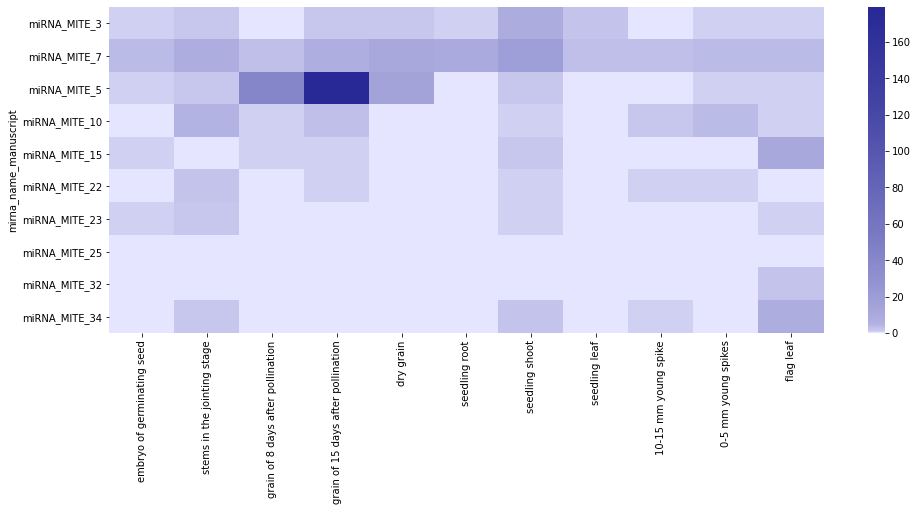

In [206]:
plt.figure(figsize=(16, 6))
sns.heatmap(df_map, cmap=custom_color_map)
plt.savefig('../data/res/heatmap.png', bbox_inches = 'tight')

In [207]:
df_res2

,Locus,Name,main,embryo of germinating seed,seedling leaf,stems in the jointing stage,10-15 mm young spike,grain of 8 days after pollination,dry grain,seedling shoot,seedling root,0-5 mm young spikes,flag leaf,grain of 15 days after pollination,miRNA_loci,miRNA_code_name,cluster_length,read_count,rpm,unique_reads,frac_top,strand,mirna_sequence,mirna_sequence_count,sequence_complexity,dicer_call,mirna_status,phase_score,short,long,20nt_count,21nt_count,22nt_count,23nt_count,24nt_count,mite_name,mirna_name,annotation,mirna_gene,mirna_length,target_gene,Expectation,epu,mirna_start,mirna_end,target_start,target_end,mirna_aligned_fragment,alignment,target_aligned_fragment,inhibition,target_description,multiplicity,site_id,target_slice,mfe_perfect,mfe_site,mfe_ratio,allen_score,paired,unpaired,alignment_structure,alignment_sequence,degradome_category,degradome_pval,plot_file,degradome_library,target_mite,target_annotation
mirna_name_manuscript,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
miRNA_MITE_3,1B:161992200-161992280,sun_all_1B:161992200-161992280,135,1.315601,2.650497,2.019959,0.166194,0.420073,1.864802,8.882654,1.330039,1.183532,1.224869,1.465657,1B:161992200-161992280,sun_all_Cluster_8835_1B_161992200_161992280,81,135,1.069,5,0.919,+,UCUGUUCACAAAUGUAAGACG,106,0.074,21,Y,-1,0,1,0,132,0,0,2,MITE_1125,hvu-miR6197,intron,TraesCS1B02G130500.1,21,TraesCS5B02G218100.1,1.0,-1,1,21,1553,1573,UCUGUUCACAAAUGUAAGACG,: :::::.::::::::::.::,CAUCUUAUAUUUGUGAACGGA,Cleavage,cdna chromosome:IWGSC:5B:391827272:391830741:-...,1,TraesCS5B02G218100.1:1564,1564,-32.4,-26.1,0.805556,3.5,"1-19,1573-1555","20-21,1554-1553[UP3]",..(((((((((((((((((((&)))))))))))))))))))..,CAUCUUAUAUUUGUGAACGGA&UCUGUUCACAAAUGUAAGACG,0,0.002596,../data/res/sun_plots/SRR1197128/sun_all_Clust...,SRR1197128_grain_8_days_after_pollination,DTT_Hvul_Oleus_AF490468-1,three_prime_UTR
miRNA_MITE_7,2B:5671327-5671460,sun_all_2B:5671327-5671460,562,3.588004,3.029140,7.842193,3.074581,3.255568,11.437454,19.071580,10.196964,3.873379,3.827717,7.537666,2B:5671327-5671460,sun_all_Cluster_28681_2B_5671327_5671460,134,562,4.450,504,0.016,-,UAUCUGGACAAAUCUGAGACA,293,0.078,21,Y,-1,19,0,24,508,5,2,4,DTT_Hvul_Pan_M801L24-1,NaN,intron,TraesCS2B02G010300.1,21,TraesCS4B02G021400.2,2.5,-1,1,21,2280,2300,UAUCUGGACAAAUCUGAGACA,:::::.:::::::::.: :::,UGUCUUAGAUUUGUCUAAAUA,Cleavage,cdna chromosome:IWGSC:4B:15416885:15421281:-1 ...,1,TraesCS4B02G021400.2:2291,2291,-34.6,-25.0,0.722543,3.5,"1-3,2300-2298;5-21,2296-2280","4-4,2297-2297[SIL]",(((((((((((((((((.(((&))).))))))))))))))))),UGUCUUAGAUUUGUCUAAAUA&UAUCUGGACAAAUCUGAGACA,1,0.026400,../data/res/sun_plots/SRR1197126/sun_all_Clust...,SRR1197126_seedling_leaf,DTT_Taes_Pan_42j2-6,three_prime_UTR
miRNA_MITE_7,2B:5671327-5671460,sun_all_2B:5671327-5671460,562,3.588004,3.029140,7.842193,3.074581,3.255568,11.437454,19.071580,10.196964,3.873379,3.827717,7.537666,2B:5671327-5671460,sun_all_Cluster_28681_2B_5671327_5671460,134,562,4.450,504,0.016,-,UAUCUGGACAAAUCUGAGACA,293,0.078,21,Y,-1,19,0,24,508,5,2,4,DTT_Hvul_Pan_M801L24-1,NaN,intron,TraesCS2B02G010300.1,21,TraesCS2D02G449600.1,2.5,-1,1,21,2626,2646,UAUCUGGACAAAUCUGAGACA,:::::.:::::::::.: :::,UGUCUUAGAUUUGUCUAAAUA,Cleavage,cdna chromosome:IWGSC:2D:559209709:559212871:-...,1,TraesCS2D02G449600.1:2637,2637,-34.6,-25.0,0.722543,3.5,"1-3,2646-2644;5-21,2642-2626","4-4,2643-2643[SIL]",(((((((((((((((((.(((&))).))))))))))))))))),UGUCUUAGAUUUGUCUAAAUA&UAUCUGGACAAAUCUGAGACA,0,0.021174,../data/res/sun_plots/SRR1197126/sun_all_Clust...,SRR1197126_seedling_leaf,DTT_Taes_Pan_42j2-6,three_prime_UTR
miRNA_MITE_5,2A:133702671-133702770,sun_mites_2A:133702671-133702770,2289,1.196001,0.000000,1.544674,0.664774,42.322379,15.415699,1.567527,0.000000,0.753157,0.918652,179.228937,2A:133702671-133702770,sun_mites_MITE_T_99232_2A_133702671_133702770,100,2289,18.126,2181,0.983,+,UGAGACGGGUAAUUUGGAACGGAG,1484,0.047,24,Y,-1,29,17,29,59,53,101,2001,DTT_Tmon_Icarus_BG607724-1,NaN,promoter,TraesCS2A02G175300